# 영화리뷰 데이터에서 자료찾기

In [1]:
import pandas as pd

In [2]:
# dataframe
data = {'country': ['Belgium', 'France', 'Germany', 'Netherlands', 'United Kingdom'],
        'population': [11.3, 64.3, 81.3, 16.9, 64.9],
        'area': [30510, 671308, 357050, 41526, 244820],
        'capital': ['Brussels', 'Paris', 'Berlin', 'Amsterdam', 'London']}
countries = pd.DataFrame(data)
countries = countries.set_index('country') # 인덱스 지정
countries

,population,area,capital
country,,,
Belgium,11.3,30510,Brussels
France,64.3,671308,Paris
Germany,81.3,357050,Berlin
Netherlands,16.9,41526,Amsterdam
United Kingdom,64.9,244820,London


---

<div class="alert alert-success">
    <b>EXERCISE</b>: 인구밀도를 의미하는 `density` 칼럼을 추가하세요. (주의: 현재 'population' 칼럼은 100만 단위로 표기되어 있습니다)  
  
</div>

In [3]:
# 인구 밀도 계산하여 새로운 열 추가
countries['density'] = (countries['population'] * 1000000)/ countries['area']
countries

,population,area,capital,density
country,,,,
Belgium,11.3,30510,Brussels,370.370370
France,64.3,671308,Paris,95.783158
Germany,81.3,357050,Berlin,227.699202
Netherlands,16.9,41526,Amsterdam,406.973944
United Kingdom,64.9,244820,London,265.092721


<div class="alert alert-success">
    <b>EXERCISE</b>: 인구밀도가 300을 초과하는 국가(country)의 수도(capital)과 인구(population)을 선택해주세요.  
  
</div>

In [4]:
countries[countries['density'] > 300][['capital', 'population']]

,capital,population
country,,
Belgium,Brussels,11.3
Netherlands,Amsterdam,16.9


<div class="alert alert-success">
    <b>EXERCISE</b>: 'density_ratio' 칼럼을 추가해주세요. (density_ratio = 인구밀도/평균 인구밀도)
</div>

In [5]:
countries['density'].mean()

273.1838790074409

In [6]:
countries['density_ratio'] = countries['density'] / countries['density'].mean()

In [7]:
countries

,population,area,capital,density,density_ratio
country,,,,,
Belgium,11.3,30510,Brussels,370.370370,1.355755
France,64.3,671308,Paris,95.783158,0.350618
Germany,81.3,357050,Berlin,227.699202,0.833502
Netherlands,16.9,41526,Amsterdam,406.973944,1.489744
United Kingdom,64.9,244820,London,265.092721,0.970382


<div class="alert alert-success">
    <b>EXERCISE</b>: 영국(United Kingdom)의 수도(capital)를 'Cambridge'로 변경해주세요.
</div>

In [8]:
countries.loc['United Kingdom', 'capital']

'London'

In [9]:
countries.loc['United Kingdom', 'capital'] = "Cambridge"

In [10]:
countries

,population,area,capital,density,density_ratio
country,,,,,
Belgium,11.3,30510,Brussels,370.370370,1.355755
France,64.3,671308,Paris,95.783158,0.350618
Germany,81.3,357050,Berlin,227.699202,0.833502
Netherlands,16.9,41526,Amsterdam,406.973944,1.489744
United Kingdom,64.9,244820,Cambridge,265.092721,0.970382


<div class="alert alert-success">
    <b>EXERCISE</b>: 인구 밀도가 100 초과, 300 미만인 국가들을 표시해주세요.  
</div>

In [11]:
#if (countries['density'] > 100) & countries['density'] < 300:
 #   countries['country']

In [12]:
countries[(countries['density'] > 100) & (countries['density'] < 300)]

,population,area,capital,density,density_ratio
country,,,,,
Germany,81.3,357050,Berlin,227.699202,0.833502
United Kingdom,64.9,244820,Cambridge,265.092721,0.970382


In [13]:
countries[(countries['density'] > 100) & (countries['density'] < 300)].index

Index(['Germany', 'United Kingdom'], dtype='object', name='country')

<div class="alert alert-success">
    <b>EXERCISE</b>: 수도가 7글자 이상인 국가들을 표시해주세요. (힌트: string의 len( )를 사용하세요.)
</div>

In [14]:
countries['capital'].str.len()

country
Belgium           8
France            5
Germany           6
Netherlands       9
United Kingdom    9
Name: capital, dtype: int64

In [15]:
countries['capital'].str.len() >= 7

country
Belgium            True
France            False
Germany           False
Netherlands        True
United Kingdom     True
Name: capital, dtype: bool

In [16]:
countries[countries['capital'].str.len() >= 7]

,population,area,capital,density,density_ratio
country,,,,,
Belgium,11.3,30510,Brussels,370.370370,1.355755
Netherlands,16.9,41526,Amsterdam,406.973944,1.489744
United Kingdom,64.9,244820,Cambridge,265.092721,0.970382


<div class="alert alert-success">
    <b>EXERCISE</b>: 수도에 'am' 이 포함되는 국가들을 표시해주세요. (힌트: string의 contains( )를 사용하세요.)
</div>

In [17]:
countries['capital'].str.contains('am')

country
Belgium           False
France            False
Germany           False
Netherlands        True
United Kingdom     True
Name: capital, dtype: bool

In [18]:
countries[countries['capital'].str.contains('am')]

,population,area,capital,density,density_ratio
country,,,,,
Netherlands,16.9,41526,Amsterdam,406.973944,1.489744
United Kingdom,64.9,244820,Cambridge,265.092721,0.970382


# 영화리뷰 데이터에서 자료 찾기

In [18]:
# from google.colab import drive
# drive.mount('/content/drive')

In [19]:
# df = pd.read_csv('/content/drive/MyDrive/Classroom/Colab Notebooks/Python강의/datas/movie_title_data.tsv', sep="\t")

In [19]:
df = pd.read_csv('/fintech_service/06_machine_learning/data/movie_title_data.tsv', sep="\t")

C:\Users\5-04\AppData\Local\Temp\ipykernel_6628\2103437288.py:1: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/fintech_service/06_machine_learning/data/movie_title_data.tsv', sep="\t")


In [20]:
df

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"
...,...,...,...,...,...,...,...,...,...
8407394,tt9916848,tvEpisode,Episode #3.17,Episode #3.17,0,2010,\N,\N,"Action,Drama,Family"
8407395,tt9916850,tvEpisode,Episode #3.19,Episode #3.19,0,2010,\N,\N,"Action,Drama,Family"
8407396,tt9916852,tvEpisode,Episode #3.20,Episode #3.20,0,2010,\N,\N,"Action,Drama,Family"
8407397,tt9916856,short,The Wind,The Wind,0,2015,\N,27,Short


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8407399 entries, 0 to 8407398
Data columns (total 9 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   tconst          object
 1   titleType       object
 2   primaryTitle    object
 3   originalTitle   object
 4   isAdult         object
 5   startYear       object
 6   endYear         object
 7   runtimeMinutes  object
 8   genres          object
dtypes: object(9)
memory usage: 577.3+ MB


In [22]:
df.isna()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
8407394,False,False,False,False,False,False,False,False,False
8407395,False,False,False,False,False,False,False,False,False
8407396,False,False,False,False,False,False,False,False,False
8407397,False,False,False,False,False,False,False,False,False


In [23]:
df.isna().sum()

tconst             0
titleType          0
primaryTitle      14
originalTitle     14
isAdult            0
startYear          0
endYear            0
runtimeMinutes     0
genres            10
dtype: int64

In [24]:
df.dropna()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"
...,...,...,...,...,...,...,...,...,...
8407394,tt9916848,tvEpisode,Episode #3.17,Episode #3.17,0,2010,\N,\N,"Action,Drama,Family"
8407395,tt9916850,tvEpisode,Episode #3.19,Episode #3.19,0,2010,\N,\N,"Action,Drama,Family"
8407396,tt9916852,tvEpisode,Episode #3.20,Episode #3.20,0,2010,\N,\N,"Action,Drama,Family"
8407397,tt9916856,short,The Wind,The Wind,0,2015,\N,27,Short


<div class="alert alert-success">
    <b>EXERCISE</b>: titles 데이터프레임에는 몇 개의 영화가 기록되어 있나요?
</div>

In [27]:
df['titleType'].unique()

array(['short', 'movie', 'tvEpisode', 'tvSeries', 'tvShort', 'tvMovie',
       'tvMiniSeries', 'tvSpecial', 'video', 'videoGame', 'tvPilot'],
      dtype=object)

In [28]:
df[df['titleType'] == 'movie']

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
498,tt0000502,movie,Bohemios,Bohemios,0,1905,\N,100,\N
570,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,\N,70,"Action,Adventure,Biography"
587,tt0000591,movie,The Prodigal Son,L'enfant prodigue,0,1907,\N,90,Drama
610,tt0000615,movie,Robbery Under Arms,Robbery Under Arms,0,1907,\N,\N,Drama
625,tt0000630,movie,Hamlet,Amleto,0,1908,\N,\N,Drama
...,...,...,...,...,...,...,...,...,...
8407288,tt9916622,movie,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,0,2015,\N,57,Documentary
8407315,tt9916680,movie,De la ilusión al desconcierto: cine colombiano...,De la ilusión al desconcierto: cine colombiano...,0,2007,\N,100,Documentary
8407327,tt9916706,movie,Dankyavar Danka,Dankyavar Danka,0,2013,\N,\N,Comedy
8407338,tt9916730,movie,6 Gunn,6 Gunn,0,2017,\N,116,\N


In [29]:
movies = df[df['titleType'] == 'movie']

In [30]:
len(movies)

593343

<div class="alert alert-success">
    <b>EXERCISE</b>: titles에서 가장 빠른 시기에 제작된 영화 두 개를 표시하세요.  힌트: .sort_values()
</div>

In [32]:
movies['startYear']

498        1905
570        1906
587        1907
610        1907
625        1908
           ... 
8407288    2015
8407315    2007
8407327    2013
8407338    2017
8407349    2013
Name: startYear, Length: 593343, dtype: object

In [27]:
movies['startYear'] = pd.to_numeric(movies['startYear'], errors='coerce')

C:\Users\5-04\AppData\Local\Temp\ipykernel_8144\2653167425.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['startYear'] = pd.to_numeric(movies['startYear'], errors='coerce')


In [28]:
movies['startYear'].isna()

498        False
570        False
587        False
610        False
625        False
           ...  
8407288    False
8407315    False
8407327    False
8407338    False
8407349    False
Name: startYear, Length: 593343, dtype: bool

In [29]:
movies['startYear'].unique()

array([1905., 1906., 1907., 1908., 1909., 1910., 1912., 1911., 1913.,
       1915., 1914., 1919., 1916., 1917., 1936., 1925., 1918., 1920.,
       1922., 1921., 2019., 1924., 1923., 1928., 1926., 1927., 1929.,
       2000., 1993., 1935., 2014., 1930., 1942., 1932., 1931., 1934.,
       1939., 1937., 1933., 1950., 1938., 1951., 1946., 1996., 1940.,
       1944., 1947., 1941., 1952., 1970., 1957., 1943., 1945., 1948.,
       2001., 1949., 1953., 2008., 1954., 1965., 1983., 1980., 1973.,
       1961., 1955., 1962., 1958., 1956., 1977., 1964., 1967., 1960.,
       1959., 1968., 1963., 1971., 1969., 1972., 1966., 1976., 1990.,
       1979., 1981., 2020., 1975., 1978., 1989., 1974., 1986., 1985.,
       1987., 2018., 1984., 1988., 1982.,   nan, 1991., 1994., 1992.,
       2005., 1995., 2004., 1998., 2002., 2017., 1997., 2021., 1999.,
       2006., 2003., 2007., 2009., 2010., 1898., 1899., 2012., 2013.,
       2011., 1904., 2015., 1897., 1901., 1902., 1900., 1903., 2016.,
       2022., 2023.,

In [30]:
movies['startYear'].min()

1896.0

In [31]:
movies['startYear'].dropna()

498        1905.0
570        1906.0
587        1907.0
610        1907.0
625        1908.0
            ...  
8407288    2015.0
8407315    2007.0
8407327    2013.0
8407338    2017.0
8407349    2013.0
Name: startYear, Length: 517483, dtype: float64

In [32]:
movies.sort_values(by = 'startYear', ascending = True).head(2)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
4845808,tt2210499,movie,Birmingham,Birmingham,0,1896.0,\N,61,Documentary
220223,tt0229676,movie,Reproduction of the Corbett and Fitzsimmons Fight,Reproduction of the Corbett and Fitzsimmons Fight,0,1897.0,\N,\N,"Documentary,News,Sport"


# -------------------------------------------

In [31]:
df['startYear'] = pd.to_numeric(df['startYear'], errors='coerce')

In [33]:
df.sort_values(by = 'startYear', ascending=True).head(2)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
5329521,tt3155794,short,Passage de Venus,Passage de Venus,0,1874.0,\N,1,"Documentary,Short"
3488807,tt14495706,short,La Rosace Magique,La Rosace Magique,0,1877.0,\N,1,"Animation,Short"


<div class="alert alert-success">
    <b>EXERCISE</b>: 제목(title)이 "Hamlet"인 영화는 몇 개가 있나요?
</div>

In [34]:
Hamlet_len = df[df['primaryTitle'] == 'Hamlet']
Hamlet_len

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
625,tt0000630,movie,Hamlet,Amleto,0,1908.0,\N,\N,Drama
626,tt0000631,short,Hamlet,Amleto,0,1908.0,\N,\N,"Drama,Short"
1228,tt0001240,movie,Hamlet,Hamlet,0,1911.0,\N,\N,Drama
1229,tt0001241,short,Hamlet,Hamlet,0,1910.0,\N,20,"Drama,Short"
1230,tt0001242,short,Hamlet,Hamlet,0,1908.0,\N,\N,"Drama,Short"
...,...,...,...,...,...,...,...,...,...
7347169,tt7656792,tvEpisode,Hamlet,Hamlet,0,2017.0,\N,\N,Animation
7413345,tt7798632,movie,Hamlet,Hamlet,0,NaN,\N,\N,Comedy
7476376,tt7934018,tvMovie,Hamlet,Hamlet,0,1983.0,\N,\N,Drama
7609545,tt8219328,tvMovie,Hamlet,Hamlet,0,2018.0,\N,191,Drama


In [35]:
len(Hamlet_len)

133

<div class="alert alert-success">
    <b>EXERCISE</b>: 제목(title)이 "Treasure Island"인 영화를 제작년도(year)의 오름차순에 따라 표시하세요
</div>

In [36]:
df[df['primaryTitle'] == 'Treasure Island'].sort_values(by='startYear', ascending=True)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
2511,tt0002538,short,Treasure Island,Treasure Island,0,1912.0,\N,\N,"Adventure,Short"
5032142,tt2440348,short,Treasure Island,Treasure Island,0,1913.0,\N,\N,"Short,Thriller"
9589,tt0009721,movie,Treasure Island,Treasure Island,0,1917.0,\N,60,Adventure
11620,tt0011785,movie,Treasure Island,Treasure Island,0,1920.0,\N,76,Adventure
25459,tt0025907,movie,Treasure Island,Treasure Island,0,1934.0,\N,110,"Adventure,Family"
...,...,...,...,...,...,...,...,...,...
1431503,tt10815740,tvEpisode,Treasure Island,Treasure Island,0,2019.0,\N,\N,Comedy
3809301,tt15075064,tvEpisode,Treasure Island,Treasure Island,0,2021.0,\N,\N,"Animation,Comedy"
1574276,tt11064450,movie,Treasure Island,Treasure Island,0,NaN,\N,\N,Adventure
4323630,tt1659339,movie,Treasure Island,Treasure Island,0,NaN,\N,\N,Adventure


<div class="alert alert-success">
    <b>EXERCISE</b>: 1590년에서 1959년 사이 몇 개의 영화가 만들어졌나요?(1950 <= 제작년도 <= 1959)
</div>

In [37]:
len(df[(df['startYear'] >= 1950) & (df['startYear'] <= 1959)])

118649

In [38]:
df[(df['startYear'] >= 1950) & (df['startYear'] <= 1959)]

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
21275,tt0021617,movie,Arizona Territory,Arizona Territory,0,1950.0,\N,56,"Action,Adventure,Western"
21712,tt0022064,movie,Lebbra bianca,Lebbra bianca,0,1951.0,\N,100,Drama
25117,tt0025557,movie,El negro que tenía el alma blanca,El negro que tenía el alma blanca,0,1951.0,\N,87,"Drama,Musical"
30454,tt0030998,movie,You're Only Young Twice,You're Only Young Twice,0,1952.0,\N,81,Comedy
31048,tt0031603,movie,Made in Germany - Die dramatische Geschichte d...,Made in Germany,0,1957.0,\N,101,"Biography,Drama"
...,...,...,...,...,...,...,...,...,...
8406493,tt9914920,tvEpisode,"Morey Amsterdam, Charles Dingle","Morey Amsterdam, Charles Dingle",0,1951.0,\N,\N,Music
8406548,tt9915032,tvEpisode,"Morey Amsterdam, Wally Brown, Ilona Massey","Morey Amsterdam, Wally Brown, Ilona Massey",0,1952.0,\N,\N,Music
8406554,tt9915048,tvEpisode,"Morey Amsterdam, Sarah Churchill","Morey Amsterdam, Sarah Churchill",0,1951.0,\N,\N,Music
8406559,tt9915058,tvEpisode,"Morey Amsterdam, Wally Brown, Rosemary Clooney...","Morey Amsterdam, Wally Brown, Rosemary Clooney...",0,1952.0,\N,\N,Music


In [39]:
len((df['startYear'] >= 1950) & (df['startYear'] <= 1959))

8407399

In [40]:
# 얘는 True, False 둘 다 나오기 때문에 값이 다른거임
((df['startYear'] >= 1950) & (df['startYear'] <= 1959))

0          False
1          False
2          False
3          False
4          False
           ...  
8407394    False
8407395    False
8407396    False
8407397    False
8407398    False
Name: startYear, Length: 8407399, dtype: bool

In [41]:
((df['startYear'] >= 1950) & (df['startYear'] <= 1959)).sum()

118649

# 타이타닉 자료에서 그룹별 연산하기

In [42]:
titanic = pd.read_csv("https://raw.githubusercontent.com/haram4th/ablearn/main/Taitanic_train.csv")

In [43]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<div class="alert alert-success">
    <b>EXERCISE</b>: groupby()를 사용하여 각 성별(sex)의 평균 나이(age)를 구하세요.
</div>

In [44]:
titanic.groupby('Sex')['Age'].mean()

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

<div class="alert alert-success">
    <b>EXERCISE</b>: 전체 승객(passenger)의 평균 생존율을 구하세요.
</div>

In [45]:
titanic['Survived'].mean()

0.3838383838383838

<div class="alert alert-success">
    <b>EXERCISE</b>: 25세 이하 승객의 생존율을 구하세요. (힌트: 불리언 인덱싱)
</div>

In [46]:
titanic[titanic['Age'] <= 25]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
877,878,0,3,"Petroff, Mr. Nedelio",male,19.0,0,0,349212,7.8958,NaN,S
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S


In [47]:
young_ages = titanic[titanic['Age'] <= 25]

In [48]:
young_ages

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
877,878,0,3,"Petroff, Mr. Nedelio",male,19.0,0,0,349212,7.8958,NaN,S
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S


In [49]:
young_ages['Survived'].mean()

0.4119601328903654

<div class="alert alert-success">
    <b>EXERCISE</b>: 남성의 생존율을 구하세요. 여성의 생존율을 구하세요. (힌트: 불리언 인덱싱)
</div>

In [50]:
titanic.groupby('Sex')['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

<div class="alert alert-success">
    <b>EXERCISE</b>: 생존율을 구하는 함수가 작성되어 있습니다. 성별 생존율을 groupby를 활용해 구하기 위해 ?부분을 알맞게 채워주세요.
</div>

In [51]:
def survival_ratio(survived):
    return survived.sum() / len(survived)

In [52]:
titanic.groupby('Sex')['Survived'].aggregate(survival_ratio)

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

<div class="alert alert-success">
    <b>EXERCISE</b>: 'Pclass'별로 생존율을 보기 위해 bar 차트를 그리고자 합니다. ?부분을 알맞게 채워서 bar 차트를 그려주세요.
</div>

In [53]:
titanic.groupby('Pclass')['Survived']

<Axes: xlabel='Pclass,Survived'>

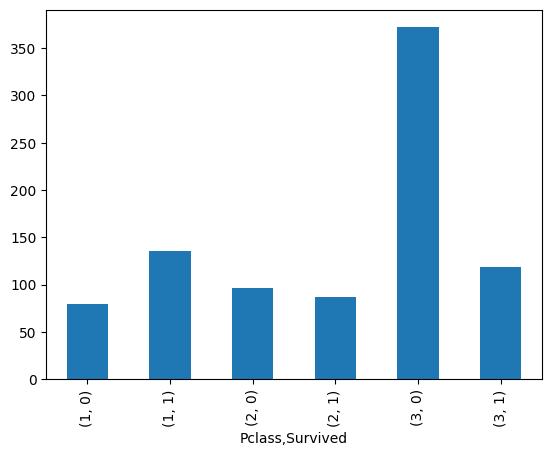

In [54]:
titanic[['Pclass', 'Survived']].groupby('Pclass').value_counts(sort = False).plot(kind = 'bar')